# 実習1-2 新型コロナ関連データ

In [1]:
# パッケージの読み込み
library('tidyverse')

── Attaching packages ─────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
getwd()

[1] "C:/Users/satoc/Documents/GitHub/lecture2022shimane"

In [ ]:
# ディレクトリの指定
# setwd('../vaccine')

In [21]:
# データの読み込み
cases = read.csv('data/covid19/cases.csv')
vaccines = read.csv('data/covid19/vaccine.csv')
prefectures = read.csv('data/covid19/prefectures.csv')
regions = read.csv('data/covid19/regions.csv')

In [6]:
# データの形状の確認
cases %>% dim()


[1] 41830     3

In [8]:
# tibbleで読み込まれていることに注意
cases %>% head()

,date,prefecture_code,cases
,<chr>,<int>,<int>
1,2020-01-16,1,0
2,2020-01-16,2,0
3,2020-01-16,3,0
4,2020-01-16,4,0
5,2020-01-16,5,0
6,2020-01-16,6,0


In [9]:
vaccines %>% dim()

[1] 232800      6

In [10]:
vaccines %>% head()

,date,prefecture,gender,elderly,status,count
,<chr>,<int>,<chr>,<int>,<int>,<int>
1,2021-04-12,1,F,0,1,3
2,2021-04-12,1,F,1,1,74
3,2021-04-12,1,M,0,1,1
4,2021-04-12,1,M,1,1,19
5,2021-04-12,1,U,NA,1,17
6,2021-04-12,2,F,0,1,5


In [11]:
prefectures %>% head()

,prefecture_code,prefecture
,<int>,<chr>
1,1,Hokkaido
2,2,Aomori
3,3,Iwate
4,4,Miyagi
5,5,Akita
6,6,Yamagata


In [12]:
regions %>% head()

,prefecture_code,region
,<int>,<chr>
1,1,Hokkaido
2,2,Tohoku
3,3,Tohoku
4,4,Tohoku
5,5,Tohoku
6,6,Tohoku


In [22]:
# 日付に変換する
vaccines$date = as.Date(vaccines$date)
cases$date = as.Date(cases$date)

## 集計

In [27]:
# filter(条件1, 条件2...)で絞り込み
# 2022/6/21のデータを試しに使う

x = vaccines %>% filter(date == '2022-06-21', prefecture_code==32) 

In [30]:
x

date,prefecture_code,gender,elderly,status,count
<date>,<int>,<chr>,<int>,<int>,<int>
2022-06-21,32,F,0,1,5
2022-06-21,32,F,0,2,7
2022-06-21,32,F,0,3,162
2022-06-21,32,F,0,4,6
2022-06-21,32,F,1,3,14
2022-06-21,32,F,1,4,61
2022-06-21,32,M,0,1,14
2022-06-21,32,M,0,2,8
2022-06-21,32,M,0,3,200


In [29]:
# group_byを使って集計
# summariseで集計する内容を設定
x %>% group_by(gender) %>% summarise(SUM=sum(count))


gender,SUM
<chr>,<int>
F,255
M,266


In [31]:
x %>% group_by(gender, elderly) %>% summarise(SUM=sum(count))

`summarise()` has grouped output by 'gender'. You can override using the `.groups` argument.


gender,elderly,SUM
<chr>,<int>,<int>
F,0,180
F,1,75
M,0,229
M,1,37


In [32]:
x %>% group_by(gender, status) %>% summarise(SUM=sum(count))

`summarise()` has grouped output by 'gender'. You can override using the `.groups` argument.


gender,status,SUM
<chr>,<int>,<int>
F,1,5
F,2,7
F,3,176
F,4,67
M,1,14
M,2,8
M,3,213
M,4,31


In [35]:
# join
vaccines %>% 
    group_by(prefecture_code) %>% 
    summarise(SUM=sum(count)) %>%
    left_join(prefectures, by='prefecture_code')

prefecture_code,SUM,prefecture
<int>,<int>,<chr>
1,11268697,Hokkaido
2,2896985,Aomori
3,2801446,Iwate
4,5015202,Miyagi
5,2282705,Akita
6,2489384,Yamagata
7,4230387,Fukushima
8,6537248,Ibaraki
9,4336537,Tochigi


In [38]:
# joinとgroup_byの合わせ技

vaccines %>% filter(date == '2022-06-21') %>%
    left_join(regions, by='prefecture_code') %>%
    group_by(region) %>% 
    summarise(SUM=sum(count))


region,SUM
<chr>,<int>
Chubu,9674
Chugoku,3852
Hokkaido,2566
Kanto,28106
Kinki,8155
Kyusyu,7222
Shikoku,1115
Tohoku,5955


In [42]:
# 日付でgroup_by
# format()関数: 日付データを文字列に変換できる

print(format(Sys.Date(), '%Y-%m-%d'))
print(format(Sys.Date(), '%Y年%m月%d日'))
print(format(Sys.Date(), '%Y/%m/%d %H:%M:%S'))


[1] "2022-06-25"
[1] "2022年06月25日"
[1] "2022/06/25 00:00:00"


month,SUM
<chr>,<int>
2021-04,641677
2021-05,8537667
2021-06,33311550
2021-07,44776744
2021-08,36980498
2021-09,33245536


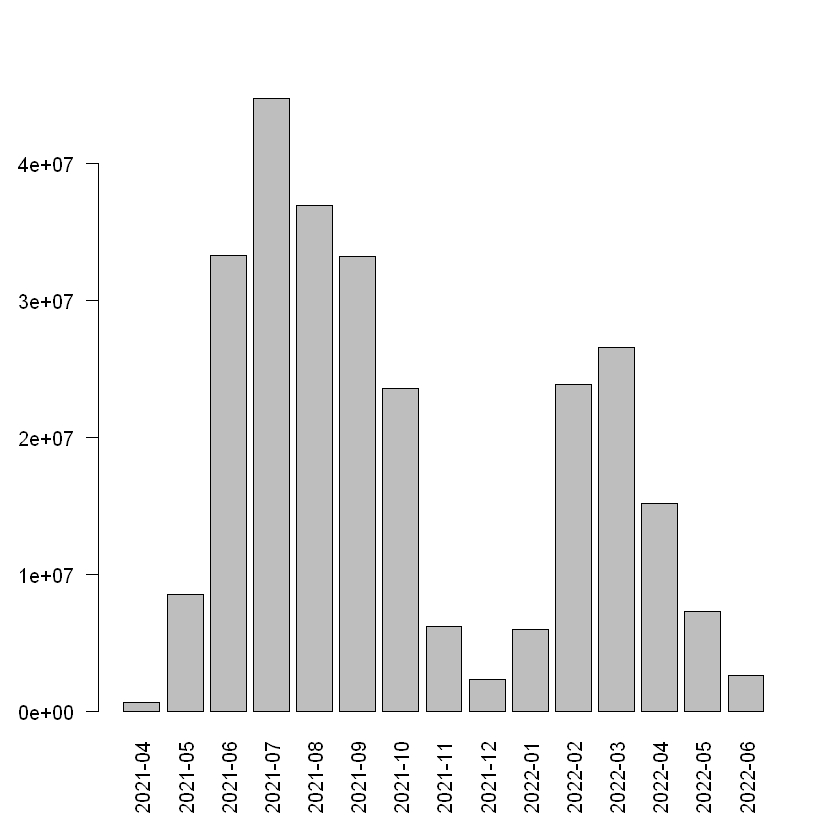

In [44]:
# 日付データを任意の文字列に変換して集約の単位とする

result = vaccines %>% 
    group_by(month=format(date, '%Y-%m')) %>%
    summarise(SUM=sum(count))

result %>% head()

# barplot() 棒グラフ
#     names: 軸ラベルの値
#     las: 軸ラベルの角度

barplot(result$SUM, names=result$month, las=2)

In [48]:
# 年代(65歳未満, 65歳以上, 不明)別の接種状況

result = vaccines %>% 
    group_by(month=format(date, '%Y-%m'), elderly) %>%
    summarise(SUM=sum(count)) %>%
    spread(elderly, SUM)

`summarise()` has grouped output by 'month'. You can override using the `.groups` argument.


month,elderly,SUM
<chr>,<int>,<int>
2021-04,0,300708
2021-04,1,292695
2021-04,NA,48274
2021-05,0,808711
2021-05,1,7375171
2021-05,NA,353785


In [47]:
# spread(): スタック形式(wide形式にする)
result %>% head() %>% spread(elderly, SUM) 


month,0,1,<NA>
<chr>,<int>,<int>,<int>
2021-04,300708,292695,48274
2021-05,808711,7375171,353785


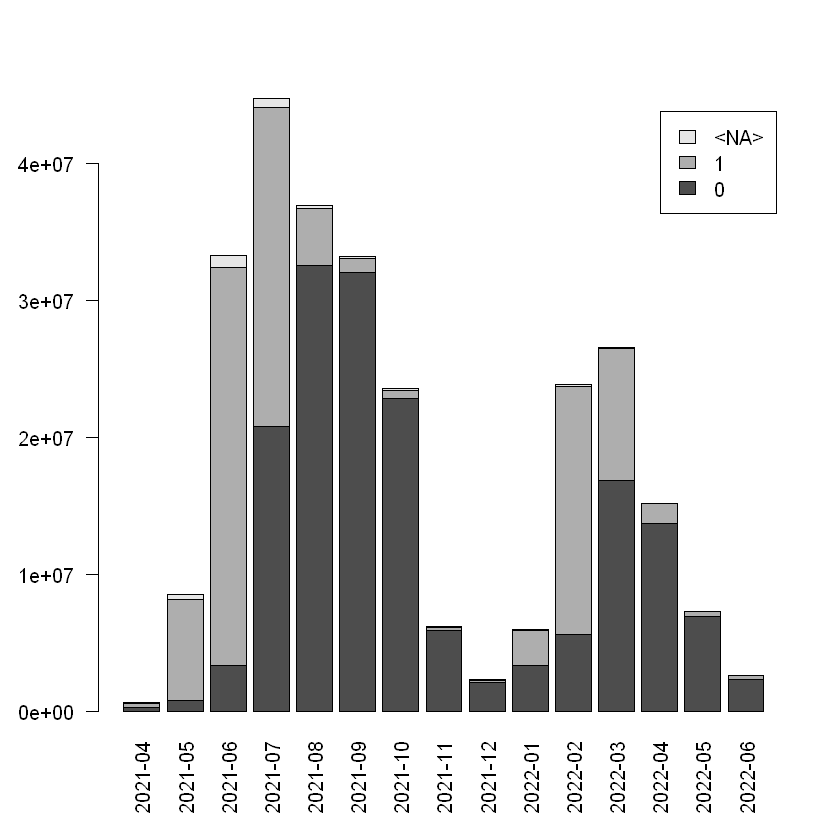

In [54]:
# barplotに行列形式で与えると積み上げ縦棒グラフになる
barplot(
    t(as.matrix(result[c('0', '1', '<NA>')])), 
    names=result$month, 
    las=2, legend=c('0', '1', '<NA>'))

In [55]:
# 接種回数別接種状況

result = vaccines %>% 
    group_by(month=format(date, '%Y-%m'), status) %>%
    summarise(SUM=sum(count)) %>%
    spread(status, SUM)

`summarise()` has grouped output by 'month'. You can override using the `.groups` argument.


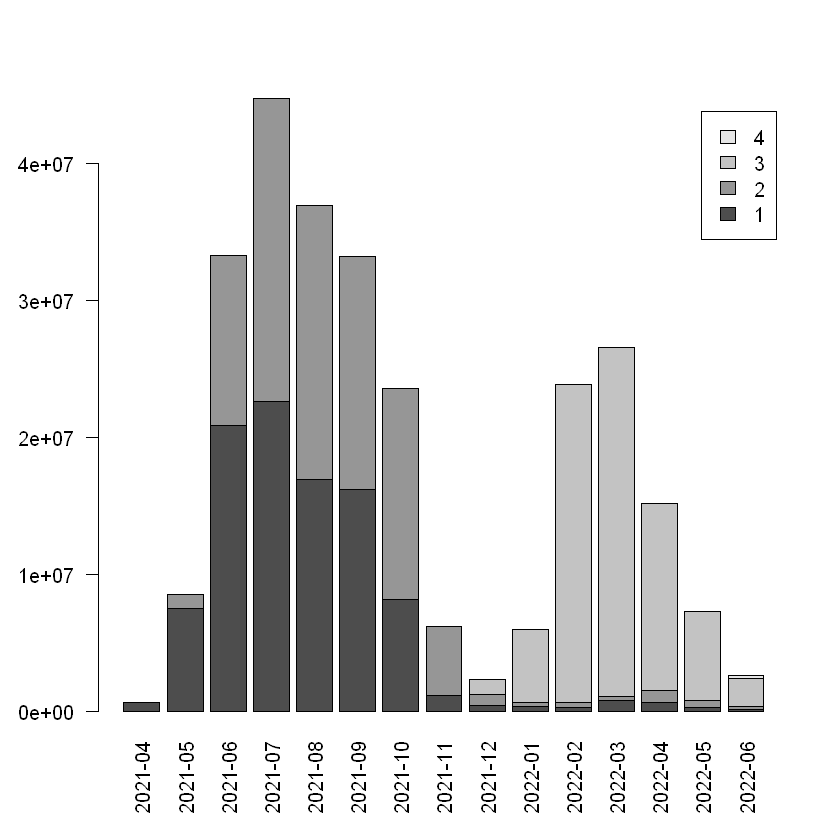

In [56]:
barplot(
    t(as.matrix(result[c('1', '2', '3', '4')])), 
    names=result$month, 
    las=2, legend=c('1', '2', '3', '4'))

In [94]:
# 折れ線グラフ

result = vaccines %>% 
    group_by(date, status) %>%
    summarise(SUM=sum(count)) %>%
    spread(status, SUM)


`summarise()` has grouped output by 'date'. You can override using the `.groups` argument.


In [95]:
result = as.data.frame(result)

In [96]:
result[is.na(result)] = 0

In [97]:

result %>% head()

,date,1,2,3,4
,<date>,<int>,<dbl>,<dbl>,<dbl>
1,2021-04-12,4703,0,0,0
2,2021-04-13,4308,0,0,0
3,2021-04-14,5280,0,0,0
4,2021-04-15,8822,0,0,0
5,2021-04-16,10712,0,0,0
6,2021-04-17,7652,0,0,0


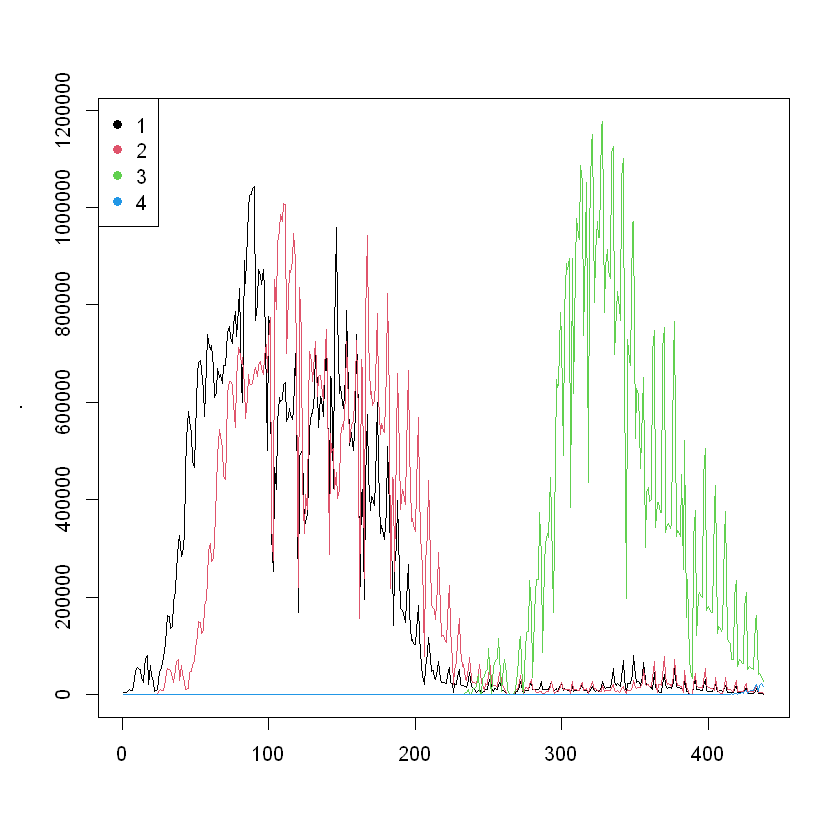

In [99]:
# matplot(): 複数の系列のグラフ
result[c('1', '2', '3', '4')] %>% matplot(type='l', lty=1, lwd=1, col=1:4)
legend('topleft', legend=1:4, pch=16, col=1:4)

In [70]:
result = cases %>% group_by(date) %>% summarise(daily_cases=sum(cases))
result %>% head()


date,daily_cases
<date>,<int>
2020-01-16,1
2020-01-17,0
2020-01-18,0
2020-01-19,0
2020-01-20,0
2020-01-21,0


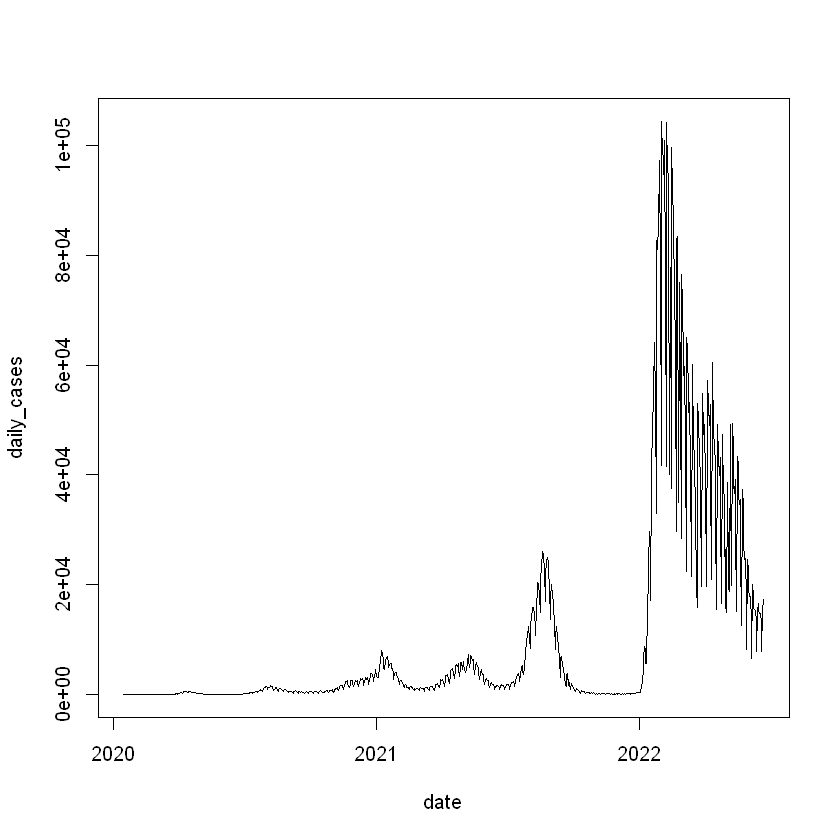

In [71]:
plot(result, type='l')

In [74]:
# ワクチン接種数と, 新規陽性者数
case_series = cases %>% 
    group_by(date) %>%
    summarise(daily_cases=sum(cases))
case_series %>% head()

date,daily_cases
<date>,<int>
2020-01-16,1
2020-01-17,0
2020-01-18,0
2020-01-19,0
2020-01-20,0
2020-01-21,0


In [81]:
vaccines %>% head()

,date,prefecture_code,gender,elderly,status,count
,<date>,<int>,<chr>,<int>,<int>,<int>
1,2021-04-12,1,F,0,1,3
2,2021-04-12,1,F,1,1,74
3,2021-04-12,1,M,0,1,1
4,2021-04-12,1,M,1,1,19
5,2021-04-12,1,U,NA,1,17
6,2021-04-12,2,F,0,1,5


In [83]:
vaccine_series = vaccines %>%
    group_by(date, status) %>%
    summarise(daily_vaccines=sum(count)) %>%
    spread(status, daily_vaccines)
vaccine_series %>% head()

`summarise()` has grouped output by 'date'. You can override using the `.groups` argument.


date,1,2,3,4
<date>,<int>,<int>,<int>,<int>
2021-04-12,4703,NA,NA,NA
2021-04-13,4308,NA,NA,NA
2021-04-14,5280,NA,NA,NA
2021-04-15,8822,NA,NA,NA
2021-04-16,10712,NA,NA,NA
2021-04-17,7652,NA,NA,NA


In [84]:
vaccine_series = as.data.frame(vaccine_series)

In [85]:
vaccine_series[is.na(vaccine_series)] = 0

In [86]:
vvaccine_series %>% head()

,date,1,2,3,4
,<date>,<int>,<dbl>,<dbl>,<dbl>
1,2021-04-12,4703,0,0,0
2,2021-04-13,4308,0,0,0
3,2021-04-14,5280,0,0,0
4,2021-04-15,8822,0,0,0
5,2021-04-16,10712,0,0,0
6,2021-04-17,7652,0,0,0


In [87]:
result = case_series %>% left_join(vaccine_series, by='date')

In [89]:
result %>% head()

date,daily_cases,1,2,3,4
<date>,<int>,<int>,<dbl>,<dbl>,<dbl>
2020-01-16,1,NA,NA,NA,NA
2020-01-17,0,NA,NA,NA,NA
2020-01-18,0,NA,NA,NA,NA
2020-01-19,0,NA,NA,NA,NA
2020-01-20,0,NA,NA,NA,NA
2020-01-21,0,NA,NA,NA,NA


In [90]:
result %>% tail()

date,daily_cases,1,2,3,4
<date>,<int>,<int>,<dbl>,<dbl>,<dbl>
2022-06-18,14822,12371,19176,162676,20128
2022-06-19,13143,2103,4160,41931,5895
2022-06-20,7782,2675,4282,43143,18474
2022-06-21,15375,2504,3921,37795,22425
2022-06-22,17270,2217,3451,33140,21756
2022-06-23,16664,1211,2134,26660,16447


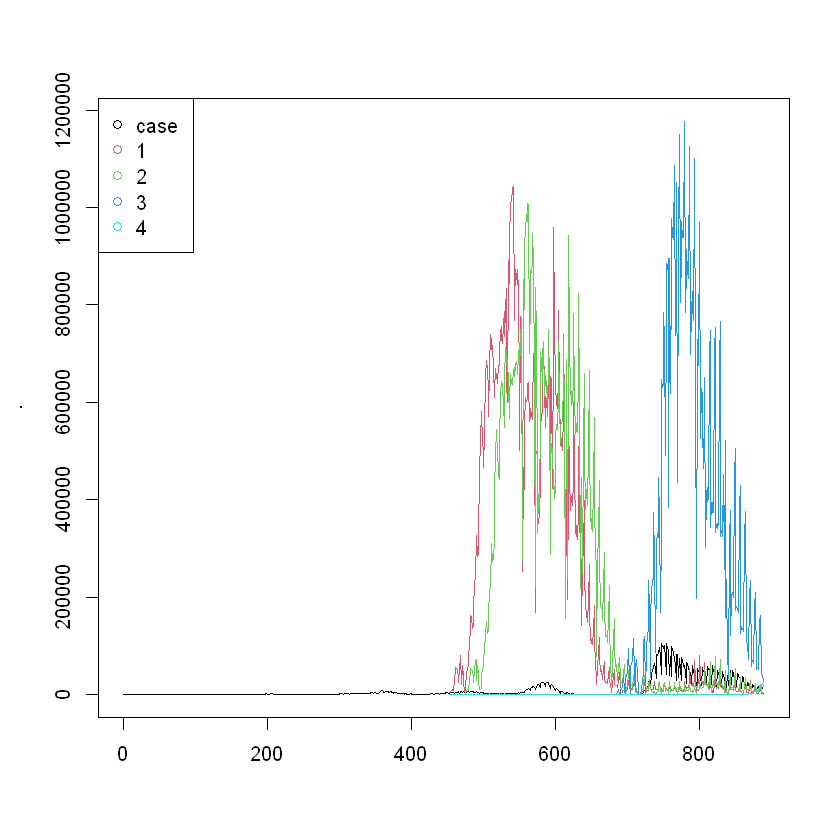

In [93]:
result[c('daily_cases', '1', '2', '3', '4')] %>% matplot(type='l', lty=1, lwd=1)
legend('topleft', legend=c('case', '1', '2', '3', '4'), pch=1, col=1:5)